In [1]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup

In [2]:
property_url = 'https://www.mudah.my/Kuala-Lumpur/Properties-for-sale-2001?o=1&q=&th=1'
property_page = requests.get(property_url)
property_html = BeautifulSoup(property_page.content,'html.parser')
property_page

<Response [200]>

In [3]:
#create empty cell for each column
areas=[]
locations=[]
prices=[]
rooms=[]
bathrooms=[]
types=[]
square_feet=[]

In [4]:
#only select the property in klang valley
list = ['Kuala-Lumpur', 'Selangor']
pages=0

for area in list:
    #control the number of pages that want to scrap,500 pages for KL and 500 pages for selangor
    for pages in range(0,500):
        pages+=1
        url = 'https://www.mudah.my/'+str(area)+'/Properties-for-sale-2001?o='+str(pages)+'&q=&th=1'
        html_page = requests.get(url)
        html = BeautifulSoup(html_page.content,'html.parser')

        house_containers = html.find_all('li',attrs={'class':'listing_ads_params'})

        if house_containers != []:
            for containers in house_containers:
                
                #only select apartment and house property, exclude land and commercial property
                if containers.find('div',attrs={'class':'bottom_info bottom_label apartments'}) or containers.find('div',attrs={'class':'bottom_info bottom_label house'}):
                    
                    #area
                    areas.append(area)

                    #location
                    if containers.find('div',attrs={'class':'area'}):
                        location=containers.find_all('div',attrs={'class':'area'})[0].get_text()
                    else: 
                        location='NA'
                    locations.append(location)

                    #price
                    if containers.find('div',attrs={'class':'ads_price'}):
                        price=containers.find('div',attrs={'class':'ads_price'}).text
                    else: 
                        price='NA'
                    prices.append(price)

                    #rooms
                    if containers.find('div',attrs={'class':'bottom_info bottom_label bedroom'}):
                        room=containers.find('div',attrs={'class':'bottom_info bottom_label bedroom'}).text
                    else: 
                        room='NA'
                    rooms.append(room) 

                    #bathroom
                    if containers.find('div',attrs={'class':'bottom_info bottom_label bathroom'}):
                        bathroom=containers.find('div',attrs={'class':'bottom_info bottom_label bathroom'}).text
                    else: 
                        bathroom='NA'                
                    bathrooms.append(bathroom)

                    #type of property
                    if containers.find('div',attrs={'class':'bottom_info bottom_label apartments'}):                                        
                        property_type=containers.find('div',attrs={'class':'bottom_info bottom_label apartments'}).text
                    elif containers.find('div',attrs={'class':'bottom_info bottom_label house'}):
                        property_type=containers.find('div',attrs={'class':'bottom_info bottom_label house'}).text
                    else: 
                        property_type='NA'
                    types.append(property_type)

                    #sq ft
                    if containers.find_all('div',attrs={'class':'bottom_info bottom_label size apartmentAndLandAndRoomsAndNew-Properties-size'}):
                        sq_ft=containers.find('div',attrs={'class':'bottom_info bottom_label size apartmentAndLandAndRoomsAndNew-Properties-size'}).text
                    elif containers.find('div',attrs={'class':'bottom_info bottom_label size house-size'}):
                        sq_ft=containers.find('div',attrs={'class':'bottom_info bottom_label size house-size'}).text
                    else:
                        sq_ft='NA'
                    square_feet.append(sq_ft)
                    
                else:
                    continue
        else:
            break

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


In [5]:
df=pd.DataFrame([[t,u,v,w,x,y,z] for t,u,v,w,x,y,z in zip(areas,locations,prices,rooms,bathrooms,types,square_feet)],
             columns=['Area','Location','Price','Room','Bathroom','House Type','Square Feet'])

In [6]:
df

,Area,Location,Price,Room,Bathroom,House Type,Square Feet
0,Kuala-Lumpur,Wangsa Maju,RM 380 000,2 Bedrooms,1 Bathroom,Apartments,722 sq.ft
1,Kuala-Lumpur,Wangsa Maju,RM 515 000,3 Bedrooms,2 Bathrooms,Apartments,1088 sq.ft
2,Kuala-Lumpur,Cheras,RM 208 000,5 Bedrooms,3 Bathrooms,Apartments,1538 sq.ft
3,Kuala-Lumpur,Cheras,RM 580 000,4 Bedrooms,4 Bathrooms,Houses,2000 sq.ft
4,Kuala-Lumpur,Bukit Jalil,RM 580 000,3 Bedrooms,2 Bathrooms,Apartments,1032 sq.ft
...,...,...,...,...,...,...,...
37488,Selangor,Shah Alam,RM 3 300 000,8 Bedrooms,8 Bathrooms,Houses,7680 sq.ft
37489,Selangor,Kota Damansara,RM 700 000,1 Bedroom,1 Bathroom,Apartments,610 sq.ft
37490,Selangor,Klang,RM 290 000,3 Bedrooms,2 Bathrooms,Apartments,960 sq.ft
37491,Selangor,Dengkil,RM 599 000,4 Bedrooms,3 Bathrooms,Houses,1600 sq.ft


In [8]:
df['House Type'].unique()

array([' Apartments ', ' Houses '], dtype=object)

In [9]:
df['Area'].unique()

array(['Kuala-Lumpur', 'Selangor'], dtype=object)

In [10]:
df.to_csv("mudah_property.csv",index=False)

Next my teammate,pik yin will explain more on scraping the link and property details in each link of the property. The property details including: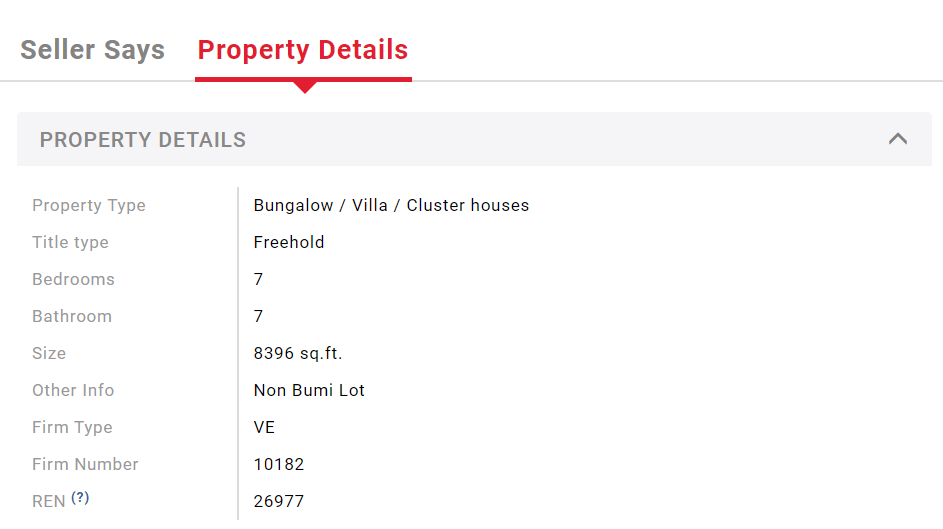